### Import packages

In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 0 Import data
 - drop columns with 80% missing, redundant, forward-looking, contain same information

In [137]:
df = pd.read_excel("Dataset case.xlsx")
df.head(20)

,loan_status_2,loan_status,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,age,pay_status
0,Charged off,1,35000,60,17.86,886.11,D5,4.0,MORTGAGE,80000.0,...,740,744,18,0,31705,64.6,2.0,0.0,27,2
1,Charged off,1,25000,60,14.85,592.79,C5,10.0,RENT,75000.0,...,705,709,14,0,38312,75.6,0.0,0.0,29,-1
2,Fully paid,0,5000,36,10.15,161.69,B2,NaN,MORTGAGE,16344.0,...,660,664,8,1,4859,51.1,3.0,1.0,33,0
3,Fully paid,0,22000,60,15.59,530.22,C5,10.0,MORTGAGE,80000.0,...,675,679,15,1,17824,52.0,2.0,0.0,36,0
4,Fully paid,0,25000,36,6.89,770.68,A3,NaN,OWN,59000.0,...,735,739,15,0,50115,37.9,2.0,0.0,56,-1
5,Fully paid,0,10400,36,18.45,378.34,D2,10.0,RENT,80000.0,...,725,729,5,0,28652,88.4,0.0,0.0,36,0
6,Fully paid,0,10000,36,13.59,339.79,C2,2.0,MORTGAGE,56000.0,...,695,699,11,1,10531,47.9,0.0,0.0,28,0
7,Charged off,1,16000,60,10.49,343.83,B3,10.0,MORTGAGE,92000.0,...,665,669,12,0,13789,50.0,0.0,0.0,26,0
8,Charged off,1,12075,36,18.84,441.65,E2,0.0,RENT,38000.0,...,665,669,5,0,7795,50.9,0.0,0.0,31,0
9,Fully paid,0,15000,36,7.59,467.22,A3,10.0,MORTGAGE,95000.0,...,755,759,15,0,35233,42.5,3.0,0.0,33,0


In [138]:
# rename default to 'target'
df = df.rename(columns = {'loan_status':'target'})

In [139]:
# detect columns with more than 80% null values
na_values = df.isnull().mean()
na_values[na_values>0.8]

Series([], dtype: float64)

In [140]:
# drop columns with more than 80% null values
#df.dropna(thresh = df.shape[0]*0.2, how = 'all', axis = 1, inplace = True)

# drop columns because it's the explanation of dependent variable, date - leave for now
df.drop(columns = ['loan_status_2', 'issue_d'], inplace = True)

In [143]:
round(df.describe(),2)

,target,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,age,pay_status
count,58852.0,58852.00,58852.00,58852.00,58852.00,55510.00,58852.00,58852.00,58852.00,58852.00,58852.00,58852.00,58852.00,58819.00,56813.00,58825.00,58852.00,58852.00
mean,0.2,14281.25,41.65,13.18,434.54,5.99,76732.13,17.99,695.97,699.97,11.62,0.22,16196.97,51.97,1.68,0.13,35.29,0.05
std,0.4,8617.25,10.18,4.75,258.65,3.68,73901.82,8.34,31.74,31.74,5.47,0.59,21133.72,24.43,2.02,0.38,9.36,1.14
min,0.0,1000.00,36.00,5.31,30.65,0.00,6695.00,0.00,660.00,664.00,1.00,0.00,0.00,0.00,0.00,0.00,20.00,-2.00
25%,0.0,7800.00,36.00,9.67,247.29,3.00,46000.00,11.77,670.00,674.00,8.00,0.00,6009.00,33.70,0.00,0.00,28.00,-1.00
50%,0.0,12000.00,36.00,12.73,373.22,6.00,65000.00,17.52,690.00,694.00,11.00,0.00,11110.50,52.50,1.00,0.00,34.00,0.00
75%,0.0,20000.00,36.00,15.99,572.60,10.00,90500.00,23.87,710.00,714.00,14.00,0.00,19836.25,70.80,3.00,0.00,41.00,1.00
max,1.0,40000.00,60.00,30.99,1607.80,10.00,6998721.00,49.94,845.00,850.00,67.00,21.00,1044210.00,162.00,24.00,8.00,78.00,9.00


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58852 entries, 0 to 58851
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   target                58852 non-null  int64         
 1   loan_amnt             58852 non-null  int64         
 2   term                  58852 non-null  int64         
 3   int_rate              58852 non-null  float64       
 4   installment           58852 non-null  float64       
 5   sub_grade             58852 non-null  object        
 6   emp_length            55510 non-null  float64       
 7   home_ownership        58852 non-null  object        
 8   annual_inc            58852 non-null  float64       
 9   verification_status   58852 non-null  object        
 10  issue_d               58852 non-null  datetime64[ns]
 11  purpose               58852 non-null  object        
 12  addr_state            58852 non-null  object        
 13  dti             

## 1 Data Explore & clean

## 1.1 Exploratory data analysis

default rate:0.2
number of default:  11772
number of non-default:  47080


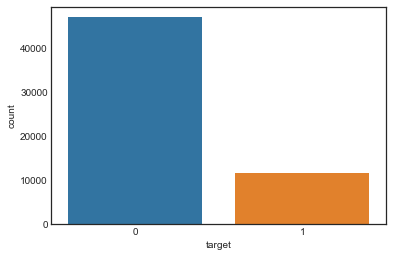

In [145]:
count = sns.countplot(x = 'target', data = df)
print('default rate:{}'.format(round(df['target'].sum()/len(df),2)))
print('number of default: ', df['target'].sum() )
print('number of non-default: ', len(df)-df['target'].sum())

### variable 1

In [ ]:
#descriptive
round(df['asset_cost'].describe(),2)

# distribution
sns.distplot(df['age'], color = 'green')

# value counts
df['children'].value_counts().sort_index()

#check distribution for default
sns.distplot(df.loc[df["target"] == 1]["age"], color = 'green')

C:\Users\XYuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

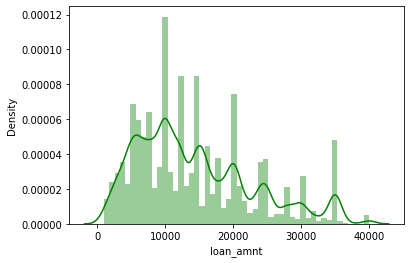

In [39]:
sns.distplot(df['loan_amnt'], color = 'green')

C:\Users\XYuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_util', ylabel='Density'>

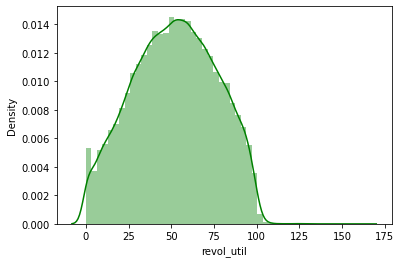

In [45]:

#missing
sns.distplot(df['revol_util'], color = 'green')

C:\Users\XYuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mort_acc', ylabel='Density'>

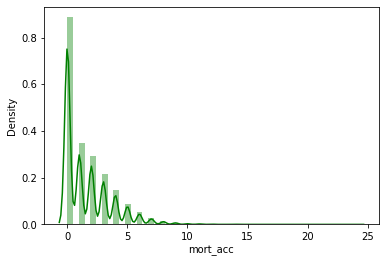

In [49]:
sns.distplot(df['mort_acc'], color = 'green')

C:\Users\XYuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Density'>

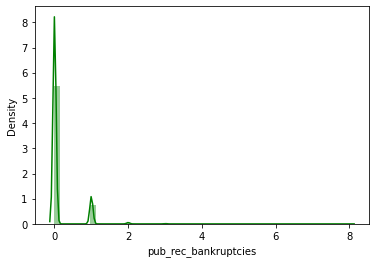

In [48]:
sns.distplot(df['pub_rec_bankruptcies'], color = 'green')

C:\Users\XYuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='term', ylabel='Density'>

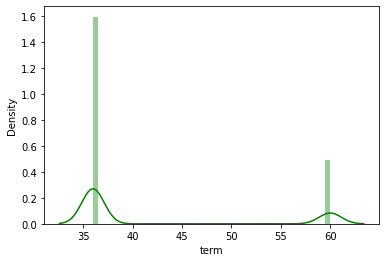

In [17]:
sns.distplot(df['term'], color = 'green')

C:\Users\XYuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

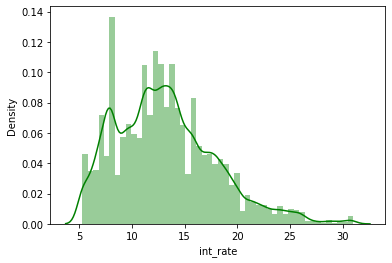

In [40]:
sns.distplot(df['int_rate'], color = 'green')

C:\Users\XYuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Density'>

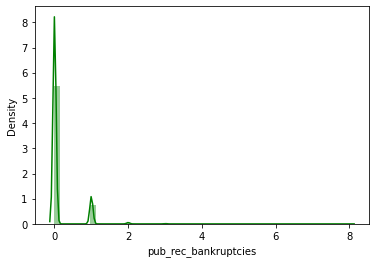

In [41]:
sns.distplot(df['pub_rec_bankruptcies'], color = 'green')

In [ ]:
# value counts
df['sub_grade'].value_counts().sort_index()

In [20]:
# value counts
df['home_ownership'].value_counts().sort_index()


ANY             9
MORTGAGE    28993
NONE            3
OTHER           8
OWN          6340
RENT        23499
Name: home_ownership, dtype: int64

In [21]:
# value counts
df['verification_status'].value_counts().sort_index()


Not Verified       17748
Source Verified    23085
Verified           18019
Name: verification_status, dtype: int64

In [ ]:
# value counts
df['verification_status'].value_counts().sort_index()


In [24]:
# value counts
df['purpose'].value_counts().sort_index()

car                     608
credit_card           13148
debt_consolidation    33998
educational              15
home_improvement       3738
house                   325
major_purchase         1290
medical                 649
moving                  387
other                  3464
renewable_energy         38
small_business          669
vacation                420
wedding                 103
Name: purpose, dtype: int64

## 1.2 Data cleaning
- convert data format
- Missing value
- outlier

In [ ]:
# # create a helper function clean up column, assign 0 to NANs, and convert to numeric

# def emp_length_converter(df, column):
#     df[column] = df[column].str.replace('\+ years', '')
#     df[column] = df[column].str.replace('< 1 year', str(0))
#     df[column] = df[column].str.replace(' years', '')
#     df[column] = df[column].str.replace(' year', '')
#     df[column] = pd.to_numeric(df[column])
#     df[column].fillna(value = 0, inplace = True)

# # apply to data
# emp_length_converter(df, 'emp_length')

# # Confirm our transformation
# df['emp_length'].unique()

In [ ]:
#date

# # convert date columns to datetime format and create a new column as a difference between today and the respective date

# def date_columns(df, column):
#     # store current month
#     today_date = pd.to_datetime('2022-10-22')
#     # convert to datetime format
#     df[column] = pd.to_datetime(df[column], format = "%b-%y")
#     # calculate the difference in months and add to a new column
#     df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
#     # make any resulting -ve values to be equal to the max date
#     df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
#     # drop the original date column
#     df.drop(columns = [column], inplace = True)

# # apply to df
# date_columns(df, 'earliest_cr_line')
# date_columns(df, 'issue_d')


# # let's check these new columns
# print(df['mths_since_earliest_cr_line'].describe())
# print(df['mths_since_issue_d'].describe())

In [ ]:
# remove string

# function to remove 'months' string from the 'term' column and convert it to numeric
# def loan_term_converter(df, column):
#     df[column] = pd.to_numeric(df[column].str.replace(' months', '')) #remove months

# loan_term_converter(df, 'term')

missing value

In [42]:
null_val_sums = df.isnull().sum()
pd.DataFrame({'column': null_val_sums.index,
                'number of null values':null_val_sums.values,
                'proportion': null_val_sums.values/len(df)})

,column,number of null values,proportion
0,target,0,0.000000
1,loan_amnt,0,0.000000
2,term,0,0.000000
3,int_rate,0,0.000000
4,installment,0,0.000000
5,sub_grade,0,0.000000
6,emp_length,3342,0.056787
7,home_ownership,0,0.000000
8,annual_inc,0,0.000000
9,verification_status,0,0.000000


In [43]:
# Nominal features
# Replacement using majority class

df["mort_acc"].fillna(value = 0,inplace = True)


In [50]:

df["revol_util"].fillna(value = df["revol_util"].mean(),inplace = True)


In [51]:
# Nominal features
# Replacement using majority class

df["pub_rec_bankruptcies"].fillna(value = 0,inplace = True)


In [52]:
# imputation missing value with median
#df = df.fillna(df.median())

df.isnull().sum()

target                     0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_length              3342
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
addr_state                 0
dti                        0
fico_range_low             0
fico_range_high            0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
mort_acc                   0
pub_rec_bankruptcies       0
age                        0
pay_status                 0
dtype: int64

In [53]:
df.pay_status.value_counts()

 0    28101
-1    10708
 1     8710
 2     5327
-2     4810
 3      892
 4      174
 5       53
 8       37
 6       21
 7       18
 9        1
Name: pay_status, dtype: int64

In [54]:
df.loc[df["pay_status"] == -2, "pay_status"] = -1

In [55]:
df.pay_status.value_counts()

 0    28101
-1    15518
 1     8710
 2     5327
 3      892
 4      174
 5       53
 8       37
 6       21
 7       18
 9        1
Name: pay_status, dtype: int64

outlier

In [ ]:
# Capping off the features (values >= 600 to 600) , VALUE(values>=400000 to 400000) , MORTDUE(values>=300000 to 300000) and DEBTINC(values >=100 to 100)

df.loc[df["CLAGE"]>=600,"CLAGE"] = 600
df.loc[df["VALUE"]>=400000,"VALUE"] = 400000

skewed

## 2 Variable selection

### 2.1 Multicollinearity
- two or more features are correlated with each other
- variance inflation factor (VIF), >5 contributing to multicollinearity

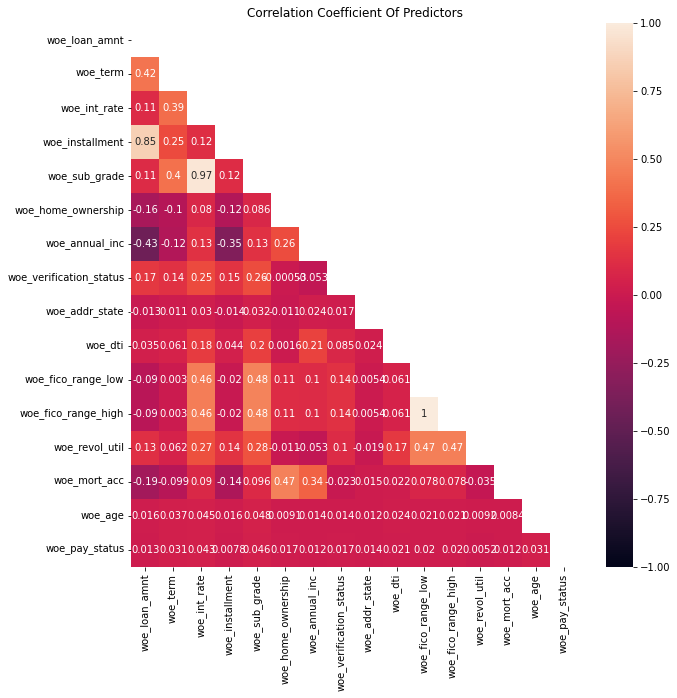

In [81]:
# set figure size
plt.figure(figsize=(10,10))

# data -woe
df_mul = df_woe[woe_cols]

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_mul.corr(), dtype=bool))


# generate heatmap
sns.heatmap(df_mul.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [87]:
df_mul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58852 entries, 0 to 58851
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   woe_loan_amnt            58852 non-null  float64
 1   woe_term                 58852 non-null  float64
 2   woe_int_rate             58852 non-null  float64
 3   woe_installment          58852 non-null  float64
 4   woe_sub_grade            58852 non-null  float64
 5   woe_home_ownership       58852 non-null  float64
 6   woe_annual_inc           58852 non-null  float64
 7   woe_verification_status  58852 non-null  float64
 8   woe_addr_state           58852 non-null  float64
 9   woe_dti                  58852 non-null  float64
 10  woe_fico_range_low       58852 non-null  float64
 11  woe_fico_range_high      58852 non-null  float64
 12  woe_revol_util           58852 non-null  float64
 13  woe_mort_acc             58852 non-null  float64
 14  woe_age               

In [75]:
'''
vif function
'''

# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
# features to consider removing
considered_features = ['woe_installment', 'woe_loan_amnt', 'woe_int_rate','woe_fico_range_high', 'woe_fico_range_low']
#considered_features = ['installment', 'loan_amnt', 'sub_grade', 'int_rate', 'fico_range_high','fico_range_low']

# compute vif 
#compute_vif(considered_features).sort_values('VIF', ascending=False)
compute_vif(considered_features).sort_values('VIF')

In [77]:
df_mul

,woe_loan_amnt,woe_term,woe_int_rate,woe_installment,woe_sub_grade,woe_home_ownership,woe_annual_inc,woe_verification_status,woe_addr_state,woe_dti,woe_fico_range_low,woe_fico_range_high,woe_revol_util,woe_mort_acc,woe_age,woe_pay_status
0,-0.211479,-0.644699,-0.613852,-0.178024,-0.724140,0.184134,0.081171,-0.219839,0.056697,-0.109450,0.463505,0.463505,-0.126665,0.114242,0.489444,-0.053635
1,0.225724,0.255167,-0.169130,0.228011,-0.276832,0.184134,-0.266103,-0.078644,0.111269,0.373886,-0.041420,-0.041420,-0.126665,0.114242,0.489444,-0.053635
2,0.270945,0.255167,-0.035786,0.228011,-0.157816,0.184134,0.251877,0.386635,-0.102333,-0.325430,-0.041420,-0.041420,-0.126665,0.114242,0.489444,-0.053635
3,-0.211479,-0.644699,-0.958662,-0.178024,-0.724140,0.184134,0.044293,-0.219839,-0.089301,-0.180237,0.033741,0.033741,-0.126665,0.114242,0.489444,-0.053635
4,-0.180850,0.255167,-0.169130,-0.161953,-0.157816,-0.198181,-0.108562,0.386635,0.248363,0.065100,-0.222570,-0.222570,-0.126665,0.114242,0.489444,-0.053635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58847,-0.198598,0.255167,-0.169130,-0.178024,-0.231071,0.184134,0.181876,-0.078644,-0.358717,-0.180237,-0.186862,-0.186862,-0.115553,0.274272,-0.169897,-0.940780
58848,-0.211479,0.255167,-0.035786,-0.178024,0.184553,0.184134,0.251877,-0.219839,-0.038346,0.198636,-0.041420,-0.041420,-0.192581,0.274272,-0.169897,-0.940780
58849,-0.030740,0.255167,0.556477,-0.123825,0.617956,-0.198181,0.044293,0.386635,-0.094228,0.351074,-0.358112,-0.358112,-0.126665,0.336389,-0.169897,-0.940780
58850,-0.068798,0.255167,-0.359458,-0.063777,-0.416555,-0.015529,-0.084892,0.386635,-0.033963,-0.513550,-0.222570,-0.222570,0.013622,0.336389,-0.169897,-0.940780


In [ ]:
# compute vif values after removing a feature
considered_features.remove('down_payment')
compute_vif(considered_features)

### 2.2 WOE: binning - woe - IV

#### Manual binning/ automatic binning with 10 bins, information value

manual binning

In [ ]:
# # manual cut - age (str)
# age_bins = [-math.inf, 20, 25, 30, 40, 60, math.inf]
# df['bin_age'] = pd.cut(df['age'], bins=age_bins).astype(str)

# # manual cut - roi (numeric)
# roi_bins = [-math.inf, 8,12,14,16,20, math.inf]
# df['bin_roi'] = pd.cut(df['roi'], bins=roi_bins).astype(str)


# # automatic cut - foir
# df['bin_dist_from_off'] = pd.qcut(df['dist_from_off'], q=5,duplicates='drop').astype(str)
# df['bin_foir'] = pd.qcut(df['foir'], q=5,duplicates='drop').astype(str)
# df['bin_tenure'] = pd.qcut(df['tenure'], q=5,duplicates='drop').astype(str)

In [56]:
'''
automatic binning with 10 bins + compute woe, iv

'''

# function
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns

    #binned new data
    data_bin = pd.DataFrame()

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')            
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})   
        
        d0 = d0.astype({"x": str})
        data_bin[ivars] = d0['x']

        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF,data_bin

In [57]:
iv, woe, data_bin = iv_woe(data = df, target = 'target', bins=10, show_woe = True)

Information value of loan_amnt is 0.033349
    Variable              Cutoff     N  Events  % of Events  Non-Events  \
0  loan_amnt  (10000.0, 12000.0]  5810    1191     0.101172        4619   
1  loan_amnt  (12000.0, 15000.0]  6783    1433     0.121730        5350   
2  loan_amnt  (15000.0, 18000.0]  4997    1152     0.097859        3845   
3  loan_amnt  (18000.0, 21000.0]  5441    1227     0.104230        4214   
4  loan_amnt  (21000.0, 27600.0]  5430    1269     0.107798        4161   
5  loan_amnt  (27600.0, 40000.0]  5864    1384     0.117567        4480   
6  loan_amnt    (5000.0, 6500.0]  3986     663     0.056320        3323   
7  loan_amnt    (6500.0, 8500.0]  5721     962     0.081719        4759   
8  loan_amnt   (8500.0, 10000.0]  6859    1216     0.103296        5643   
9  loan_amnt   (999.999, 5000.0]  7961    1275     0.108308        6686   

   % of Non-Events       WoE        IV  
0         0.098110 -0.030740  0.000094  
1         0.113636 -0.068798  0.000557  
2       

In [58]:
round(iv,2)

,Variable,IV
0,loan_amnt,0.03
0,term,0.16
0,int_rate,0.42
0,installment,0.03
0,sub_grade,0.47
0,emp_length,0.01
0,home_ownership,0.03
0,annual_inc,0.04
0,verification_status,0.06
0,issue_d,0.06


In [62]:
iv_important = iv[iv['IV']>0.02]
iv_important

,Variable,IV
0,loan_amnt,0.033349
0,term,0.162292
0,int_rate,0.420438
0,installment,0.030186
0,sub_grade,0.466201
0,home_ownership,0.032927
0,annual_inc,0.035669
0,verification_status,0.058208
0,issue_d,0.057355
0,addr_state,0.024248


In [59]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,loan_amnt,"(10000.0, 12000.0]",5810,1191,0.101172,4619,0.098110,-0.030740,0.000094
1,loan_amnt,"(12000.0, 15000.0]",6783,1433,0.121730,5350,0.113636,-0.068798,0.000557
2,loan_amnt,"(15000.0, 18000.0]",4997,1152,0.097859,3845,0.081669,-0.180850,0.002928
3,loan_amnt,"(18000.0, 21000.0]",5441,1227,0.104230,4214,0.089507,-0.152284,0.002242
4,loan_amnt,"(21000.0, 27600.0]",5430,1269,0.107798,4161,0.088381,-0.198598,0.003856
...,...,...,...,...,...,...,...,...,...
9,age,"(49.0, 78.0]",5170,1604,0.136256,3566,0.075743,-0.587180,0.035532
0,pay_status,"(-1.001, 0.0]",43619,7315,0.621390,36304,0.771113,0.215876,0.032322
1,pay_status,"(0.0, 1.0]",8710,2878,0.244478,5832,0.123874,-0.679860,0.081994
2,pay_status,"(1.0, 2.0]",5327,1112,0.094461,4215,0.089528,-0.053635,0.000265


In [13]:
# def cal_IV(df, feature, target):
#     lst = []
#     cols=['Variable', 'Value', 'All', 'Bad']
#     for i in range(df[feature].nunique()):
        
#         val = list(df[feature].unique())[i]
#         lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
# #     print(lst)
#     data = pd.DataFrame(lst, columns=cols)
#     data = data[data['Bad'] > 0]

#     data['Share'] = data['All'] / data['All'].sum()
#     data['Bad Rate'] = data['Bad'] / data['All']
#     data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
#     data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
#     data['WoE'] = np.log(data['Distribution Bad'] / data['Distribution Good'])
#     data['IV'] = (data['WoE'] * (data['Distribution Bad'] - data['Distribution Good'])).sum()

#     data = data.sort_values(by=['Variable', 'Value'], ascending=True)

#     return data['IV'].values[0]

In [24]:
# transform to woe value

# def cal_WOE(df,features,target):
#     df_new = df
#     for f in features:
#         df_woe = df_new.groupby(f).agg({target:['sum','count']})
#         df_woe.columns = list(map(''.join, df_woe.columns.values))
#         df_woe = df_woe.reset_index()
#         df_woe = df_woe.rename(columns = {target+'sum':'bad'})
#         df_woe = df_woe.rename(columns = {target+'count':'all'})
#         df_woe['good'] = df_woe['all']-df_woe['bad']
#         df_woe = df_woe[[f,'good','bad']]
#         df_woe['bad_rate'] = df_woe['bad'].mask(df_woe['bad']==0, 1)/df_woe['bad'].sum() # mask 0 to 1 to avoid log(0)
#         df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()
        
#         df_woe['woe'] = np.log(df_woe['bad_rate'].divide(df_woe['good_rate'],fill_value=1))
#         df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
#         df_new = df_new.merge(df_woe,on=f,how='left')
#     return df_new
        

only select IV>0.1, transform to WOE value

In [60]:
# transform to woe value

def cal_WOE(data_bin_selected, woe, features):
    df_woe = data_bin_selected.copy().reset_index()

    for f in features:
        variable = woe[woe['Variable'] == f] #data with only one variable and their woe
        
        df_woe = df_woe.merge(variable['WoE'], left_on = f, right_on = variable['Cutoff'])
        new_col_name = 'woe_' + f        
        df_woe = df_woe.rename(columns = {'WoE':new_col_name})

    return df_woe

In [65]:
iv_important

,Variable,IV
0,loan_amnt,0.033349
0,term,0.162292
0,int_rate,0.420438
0,installment,0.030186
0,sub_grade,0.466201
0,home_ownership,0.032927
0,annual_inc,0.035669
0,verification_status,0.058208
0,issue_d,0.057355
0,addr_state,0.024248


In [66]:
features_cols = iv_important[['Variable']]
features_cols 

,Variable
0,loan_amnt
0,term
0,int_rate
0,installment
0,sub_grade
0,home_ownership
0,annual_inc
0,verification_status
0,issue_d
0,addr_state


In [68]:
features_cols.shape

(17, 1)

### 2.3 selected variebles, transform to WOE value

In [ ]:
# selected features
#feature_cols = data_bin.columns
feature_cols = ['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'home_ownership','annual_inc', 'verification_status', 'addr_state', 'dti','fico_range_low',  'fico_range_high', 'revol_util', 'mort_acc', 'age', 'pay_status' ]
# selecte feature + target from binned dataset
data_bin_selected = data_bin[feature_cols] 
data_bin_selected = data_bin_selected.join(df['target']) # add target


# convert to woe value
df_woe = cal_WOE(data_bin_selected, woe, feature_cols)
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]

df_woe[woe_cols]

### 2.4 variable selection from Lasso 
- l1 penalty
- penalize complexity, coefficient equal to 0
- scaling/standardization beforehand

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import Lasso

# X_Ltrain, X_Ltest, y_Ltrain, y_Ltest = train_test_split(df_woe[woe_cols], df_woe['target'], test_size=0.33, random_state=42)

# pipeline = Pipeline([
#                      ('scaler',StandardScaler()),
#                      ('model',Lasso())
# ])

# search = GridSearchCV(pipeline,
#                       {'model__alpha':np.arange(0.1,10,0.1)},
#                       cv = 5, scoring="neg_mean_squared_error",verbose=3
#                       )

# search.fit(X_Ltrain,y_Ltrain)

In [189]:
# search.best_params_

# coefficients = search.best_estimator_.named_steps['model'].coef_
# importance = np.abs(coefficients)
# importance

In [88]:
df_woe[woe_cols]

,woe_loan_amnt,woe_term,woe_int_rate,woe_installment,woe_sub_grade,woe_home_ownership,woe_annual_inc,woe_verification_status,woe_addr_state,woe_dti,woe_fico_range_low,woe_fico_range_high,woe_revol_util,woe_mort_acc,woe_age,woe_pay_status
0,-0.211479,-0.644699,-0.613852,-0.178024,-0.724140,0.184134,0.081171,-0.219839,0.056697,-0.109450,0.463505,0.463505,-0.126665,0.114242,0.489444,-0.053635
1,0.225724,0.255167,-0.169130,0.228011,-0.276832,0.184134,-0.266103,-0.078644,0.111269,0.373886,-0.041420,-0.041420,-0.126665,0.114242,0.489444,-0.053635
2,0.270945,0.255167,-0.035786,0.228011,-0.157816,0.184134,0.251877,0.386635,-0.102333,-0.325430,-0.041420,-0.041420,-0.126665,0.114242,0.489444,-0.053635
3,-0.211479,-0.644699,-0.958662,-0.178024,-0.724140,0.184134,0.044293,-0.219839,-0.089301,-0.180237,0.033741,0.033741,-0.126665,0.114242,0.489444,-0.053635
4,-0.180850,0.255167,-0.169130,-0.161953,-0.157816,-0.198181,-0.108562,0.386635,0.248363,0.065100,-0.222570,-0.222570,-0.126665,0.114242,0.489444,-0.053635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58847,-0.198598,0.255167,-0.169130,-0.178024,-0.231071,0.184134,0.181876,-0.078644,-0.358717,-0.180237,-0.186862,-0.186862,-0.115553,0.274272,-0.169897,-0.940780
58848,-0.211479,0.255167,-0.035786,-0.178024,0.184553,0.184134,0.251877,-0.219839,-0.038346,0.198636,-0.041420,-0.041420,-0.192581,0.274272,-0.169897,-0.940780
58849,-0.030740,0.255167,0.556477,-0.123825,0.617956,-0.198181,0.044293,0.386635,-0.094228,0.351074,-0.358112,-0.358112,-0.126665,0.336389,-0.169897,-0.940780
58850,-0.068798,0.255167,-0.359458,-0.063777,-0.416555,-0.015529,-0.084892,0.386635,-0.033963,-0.513550,-0.222570,-0.222570,0.013622,0.336389,-0.169897,-0.940780


In [89]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler

x_lasso = pd.DataFrame(df_woe[woe_cols])
y_lasso = pd.DataFrame(df_woe['target'])

Min_Max = MinMaxScaler()

X_lasso = Min_Max.fit_transform(x_lasso)
Y_lasso = Min_Max.fit_transform(y_lasso)

# Split the data into 40% test and 60% training
X_train, X_test, Y_train, Y_test = train_test_split(X_lasso, Y_lasso, test_size=0.4, random_state=0)

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train, np.ravel(Y_train,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)

In [90]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 16
selected features: 16
features with coefficients shrank to zero: 0


In [91]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

removed = x_lasso.columns[removed_feats]
removed

Index([], dtype='object')

In [ ]:
# removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
# removed_feats

# X_train_selected = sel_.transform(X_train)
# X_test_selected = sel_.transform(X_test)
# X_train_selected.shape, X_test_selected.shape

### 2.5 Final features

In [96]:
final_col = ['woe_term', 'woe_installment', 'woe_sub_grade', 'woe_home_ownership','woe_annual_inc', 'woe_verification_status', 
'woe_addr_state', 'woe_dti', 'woe_fico_range_high', 'woe_revol_util', 'woe_mort_acc', 'woe_age', 'woe_pay_status' ]
 # woe!

final_col_scorecard = ['term', 'installment', 'sub_grade', 'home_ownership','annual_inc', 'verification_status', 'addr_state', 'dti', 'fico_range_high', 'revol_util', 'mort_acc', 'age', 'pay_status' ]
 # without woe

#df_woe = df_woe.drop(columns = ['prospect_no'], inplace = True)


## 3 Modeling

### 3.1 Split data + SMOTE (synthetic minority oversampling technique)

In [97]:
# train test split
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X_train, X_test, y_train, y_test = train_test_split(df_woe[final_col], df_woe['target'], test_size=0.2, random_state=42, stratify = df_woe['target'])

In [98]:
print('bad rate is: ', round(y_train.mean(),2))

bad rate is:  0.2


In [99]:
# SMOTE method solving unbalanced issue
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print('bad rate is: ', round(y_train.mean(),2))

bad rate is:  0.5


### 3.2.1 Modeling - Logistic regression

In [100]:
#logistic regression
model_lr = LogisticRegression(random_state=42).fit(X_train,y_train) # balance data - class_weight = 'balanced'

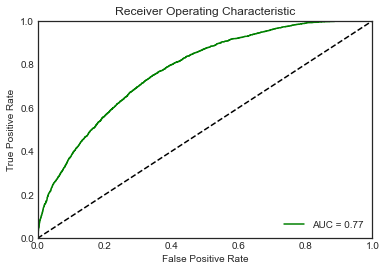

In [101]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_lr.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-white')
#sns.set()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
# test
#r squared, % of the variation in the exam scores can be explained
r_squared_lr = model_lr.score(X_test,y_test)
print('R-squared: ', round(r_squared_lr,2))

#gini
gini_lr = roc_auc * 2 - 1
print('GINI: ', round(gini_lr,2))

R-squared:  0.68
GINI:  0.55


In [111]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr)) # r squared
print("f1:", f1_score(y_test, y_pred_lr, average="macro"))
print("precision:", precision_score(y_test, y_pred_lr, average="macro"))
print("recall:", recall_score(y_test, y_pred_lr, average="macro"))

Accuracy: 0.6790417126837142
f1: 0.6239042432070961
precision: 0.6329376523909742
recall: 0.7019455974111013


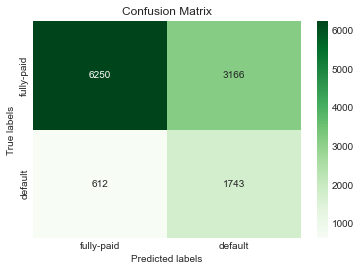

In [104]:
#confusion matrix
y_pred_lr = model_lr.predict(X_test)
cf_matrix = metrics.confusion_matrix(y_test,y_pred_lr)

import seaborn as sns
plt.style.use('seaborn-white')
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Greens')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['fully-paid','default']); ax.yaxis.set_ticklabels(['fully-paid','default']);
#sns.heatmap(cf_matrix, fmt='', cmap='Greens')

In [105]:
sum(y_test)

2355

In [106]:
model_lr.coef_

array([[-0.55570403, -0.90004957, -0.63777599, -0.56362165, -0.95282878,
        -0.34288111, -1.04647963, -0.49991785, -0.49344862,  0.12025672,
        -0.55962047, -0.95245015, -0.79722234]])

### 3.2.2 Decision tree

In [107]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_t = clf.predict(X_test)



In [108]:
# test
#r squared, % of the variation in the exam scores can be explained
r_squared = clf.score(X_test,y_test)
print('R-squared: ', round(r_squared,2))

#gini
gini = roc_auc * 2 - 1
print('GINI: ', round(gini,2))

R-squared:  0.72
GINI:  0.55


<AxesSubplot:>

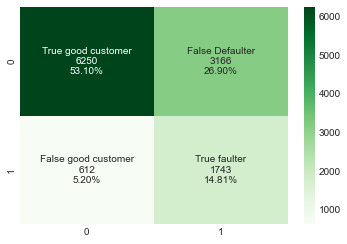

In [109]:
#confusion matrix
cf_matrix_t = metrics.confusion_matrix(y_test,y_pred_t)

import seaborn as sns
plt.style.use('seaborn-white')
group_names = ['True good customer','False Defaulter','False good customer','True faulter']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [110]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_t)) # r squared
print("f1:", f1_score(y_test, y_pred_t, average="macro"))
print("precision:", precision_score(y_test, y_pred_t, average="macro"))
print("recall:", recall_score(y_test, y_pred_t, average="macro"))

Accuracy: 0.7180358508198114
f1: 0.5807383759729337
precision: 0.5777404502074382
recall: 0.5854153926911234


In [112]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr)) # r squared
print("f1:", f1_score(y_test, y_pred_lr, average="macro"))
print("precision:", precision_score(y_test, y_pred_lr, average="macro"))
print("recall:", recall_score(y_test, y_pred_lr, average="macro"))

Accuracy: 0.6790417126837142
f1: 0.6239042432070961
precision: 0.6329376523909742
recall: 0.7019455974111013


## 4 Score card development

Score_i= (βi × WoE_i + α/n) × Factor + Offset/n

Where:
- βi — logistic regression coefficient for the variable Xi
- α — logistic regression intercept
- WoE — Weight of Evidence value for variable Xi
- n — number of independent variable Xi in the model
- Factor, Offset — known as scaling parameter, where

- Factor = pdo/ln(2)
- Offset = Target Score — (Factor × ln(Target Odds))

In [124]:
A = 650
B = 72.13

In [125]:
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['Variable']==f] #features-variable
        for index,row in df.iterrows():
            lst.append([f,row['Cutoff'],int(round(-coef[i]*row['WoE']*B))]) #bin-cutoff
    data = pd.DataFrame(lst, columns=cols)
    return data

In [127]:
final_col_scorecard

['term',
 'installment',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'addr_state',
 'dti',
 'fico_range_high',
 'revol_util',
 'mort_acc',
 'age',
 'pay_status']

In [126]:
score_card = generate_scorecard(model_lr.coef_,woe,final_col_scorecard,B)
score_card

,Variable,Binning,Score
0,term,36,10
1,term,60,-26
2,installment,"(157.352, 215.798]",15
3,installment,"(215.798, 272.15]",9
4,installment,"(272.15, 323.38]",6
...,...,...,...
161,age,"(49.0, 78.0]",-40
162,pay_status,"(-1.001, 0.0]",12
163,pay_status,"(0.0, 1.0]",-39
164,pay_status,"(1.0, 2.0]",-3


In [128]:
sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

Variable          Binning  Score
Variable                                                            
addr_state          112           addr_state               VT     79
                    73            addr_state               DC     38
                    103           addr_state               OR     37
                    87            addr_state               ME     34
                    105           addr_state               RI     33
...                                      ...              ...    ...
term                0                   term               36     10
                    1                   term               60    -26
verification_status 63   verification_status     Not Verified     10
                    64   verification_status  Source Verified     -2
                    65   verification_status         Verified     -5

[166 rows x 3 columns]

In [135]:
sort_scorecard

Variable          Binning  Score
Variable                                                            
addr_state          112           addr_state               VT     79
                    73            addr_state               DC     38
                    103           addr_state               OR     37
                    87            addr_state               ME     34
                    105           addr_state               RI     33
...                                      ...              ...    ...
term                0                   term               36     10
                    1                   term               60    -26
verification_status 63   verification_status     Not Verified     10
                    64   verification_status  Source Verified     -2
                    65   verification_status         Verified     -5

[166 rows x 3 columns]

In [129]:
# map value to bin, get credit score
def str_to_int(s):
    if s == '-inf':
        return -999999999.0
    elif s=='inf':
        return 999999999.0
    else:
        return float(s)
    
def map_value_to_bin(feature_value,feature_to_bin):
    for idx, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=="("
        right_open = bins[-1]==")"
        binnings = bins[1:-1].split(',')
        in_range = True
        # check left bound
        if left_open:
            if feature_value<= str_to_int(binnings[0]):
                in_range = False   
        else:
            if feature_value< str_to_int(binnings[0]):
                in_range = False   
        #check right bound
        if right_open:
            if feature_value>= str_to_int(binnings[1]):
                in_range = False 
        else:
            if feature_value> str_to_int(binnings[1]):
                in_range = False   
        if in_range:
            return row['Binning']
    return null

def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable']==col]
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
        score += selected_record_in_scorecard['Score'].iloc[0]
    return score  

def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] = df['score']+A
    df['score'] = df['score'].astype(int)
    return df

In [118]:
# randomly sample good and bad sample to test scorecard
good_sample = df[df['target']==0].sample(5, random_state=1)
good_sample = good_sample[final_col_scorecard]
bad_sample = df[df['target']==1].sample(5, random_state=1)
bad_sample = bad_sample[final_col_scorecard]

In [130]:
good_sample

,term,installment,sub_grade,home_ownership,annual_inc,verification_status,addr_state,dti,fico_range_high,revol_util,mort_acc,age,pay_status
13726,36,230.74,B5,MORTGAGE,110000.0,Not Verified,IL,12.93,719,53.2,8.0,23,0
16106,36,254.26,D4,MORTGAGE,21000.0,Not Verified,CO,21.03,684,48.9,1.0,41,-1
28985,36,354.58,C1,MORTGAGE,45000.0,Not Verified,KY,28.99,699,59.9,3.0,46,1
24263,36,203.88,C2,MORTGAGE,75000.0,Source Verified,CA,35.46,689,27.6,1.0,36,1
52164,60,288.72,C4,OWN,42000.0,Verified,FL,26.75,704,44.0,2.0,35,-1


In [121]:
bad_sample

,term,installment,sub_grade,home_ownership,annual_inc,verification_status,addr_state,dti,fico_range_high,revol_util,mort_acc,age,pay_status
16786,60,415.76,C4,RENT,50400.0,Source Verified,AZ,26.12,684,45.6,1.0,28,0
39793,36,879.18,C5,OWN,51000.0,Not Verified,TX,27.36,699,33.2,0.0,33,0
52774,60,608.65,B4,MORTGAGE,90000.0,Not Verified,TX,22.51,729,60.6,4.0,56,1
54655,36,167.85,C1,RENT,40000.0,Verified,CO,17.01,684,96.4,0.0,41,0
11846,36,407.75,C2,RENT,53500.0,Source Verified,AL,30.62,709,37.2,0.0,28,0


In [131]:
calculate_score_with_card(good_sample,score_card,A)

ValueError: could not convert string to float: ''

In [ ]:
calculate_score_with_card(bad_sample,score_card, A)